In [1]:
import numpy as np
import scipy.special
from scipy.optimize import minimize

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ, execute
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.circuit.library.standard_gates import XXPlusYYGate

from src import QAOA_utilities as QAOAut
from src import CellFreeQAOA as CFQAOA

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [2]:
MK = 5
qc = QuantumCircuit(MK)

In [3]:
# Us

In [4]:
beta = Parameter('β')
qc = QAOAut.Um_ring(MK,beta)
qc.draw()

┌─────────────────┐                   ┌─────────────────┐
q_0: ┤0                ├───────────────────┤1                ├
     │  {XX+YY}(4*β,0) │┌─────────────────┐│                 │
q_1: ┤1                ├┤0                ├┤                 ├
     ├─────────────────┤│  {XX+YY}(4*β,0) ││                 │
q_2: ┤0                ├┤1                ├┤  {XX+YY}(4*β,0) ├
     │  {XX+YY}(4*β,0) │├─────────────────┤│                 │
q_3: ┤1                ├┤0                ├┤                 ├
     └─────────────────┘│  {XX+YY}(4*β,0) ││                 │
q_4: ───────────────────┤1                ├┤0                ├
                        └─────────────────┘└─────────────────┘

In [5]:
# test initial state circuit
M = 3
K = 3

tg = 10.0 ** np.array([ -3, -2.5, -1.5, -1, -0.5]) # should find a good way to produce this
tg = np.array([1])
Nt = len(tg)

lambda_soft = 10
rho = 1
rng = np.random.default_rng(2144)
eta = rng.random(K) # power control fraction for each user TO BE OTPIMIZED
alpha = rng.random((M,K))
beta = rng.random((M,K))

MK = M*K
nqubits = MK + Nt
BW_max = 3

qc = QuantumCircuit(nqubits)
Us = QAOAut.U_alpha(MK,BW_max) +  QAOAut.Unn(MK)    
#U_test = QuantumCircuit(MK)
#U_test.x(MK-1)
#U_test.x(MK-2)
#Us = U_test + QAOAut.Unn(MK) 
qc.compose(Us,qubits = list(range(MK)), inplace = True)
for i in range(MK, nqubits):
    qc.h(i)
    
qc.draw()

/home/alb/Scrivania/Quantum/Projects/Applications/QAOA-CellFreeMIMO/virtual_QAOA-CellFreeMIMO/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.


»
q_0: ─────────────────────────────────────────────────────────────»
                                                                  »
q_1: ─────────────────────────────────────────────────────────────»
                                                                  »
q_2: ─────────────────────────────────────────────────────────────»
                                                                  »
q_3: ─────────────────────────────────────────────────────────────»
                                                                  »
q_4: ─────────────────────────────────────────────────────────────»
                                                                  »
q_5: ─────────────────────────────────────────────────────────────»
                       ┌────────────┐                             »
q_6: ──────────────────┤ Ry(1.9823) ├──────────────────────────■──»
          ┌───────────┐└─────┬──────┘     ┌────────────┐       │  »
q_7: ─────┤ Ry(2.607) ├──────■─────────■──┤ Ry(2.4619) ├──■────┼──»
     ┌───┐└─────┬─────┘              ┌─┴─┐└─────┬──────┘┌─┴─┐┌─┴─┐»
q_8: ┤ X ├──────■────────────────────┤ X ├──────■───────┤ X ├┤ X ├»
     ├───┤                           └───┘              └───┘└───┘»
q_9: ┤ H ├────────────────────────────────────────────────────────»
     └───┘                                                        »
«                                                                        »
«q_0: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_1: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_2: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_3: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«q_4: ──────────────────────────────────────────────────■────────────────»
«                             ┌────────────┐            │                »
«q_5: ─────────────────────■──┤ Ry(1.9106) ├──■─────────┼────────────────»
«     ┌────────────┐       │  └─────┬──────┘  │         │  ┌────────────┐»
«q_6: ┤ Ry(2.1598) ├──■────┼────────■─────────┼────■────┼──┤ Ry(2.4189) ├»
«     └─────┬──────┘  │    │        │         │  ┌─┴─┐  │  └─────┬──────┘»
«q_7: ──────■─────────┼────┼────────┼─────────┼──┤ X ├──┼────────■───────»
«           │       ┌─┴─┐┌─┴─┐      │       ┌─┴─┐└───┘┌─┴─┐              »
«q_8: ──────■───────┤ X ├┤ X ├──────■───────┤ X ├─────┤ X ├──────────────»
«                   └───┘└───┘              └───┘     └───┘              »
«q_9: ───────────────────────────────────────────────────────────────────»
«                                                                        »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                   ┌────────────┐          »
«q_3: ───────────────────────────────■──────────────┤ Ry(1.4595) ├───────■──»
«     ┌────────────┐                 │              └─────┬──────┘       │  »
«q_4: ┤ Ry(1.6821) ├───────■─────────┼────────────────────■──────────────┼──»
«     └─────┬──────┘       │         │  ┌──────────┐      │              │  »
«q_5: ──────■──────────────┼────■────┼──┤ Ry(2π/3) ├──────┼─────────■────┼──»
«           │              │    │    │  └────┬─────┘      │         │    │  »
«q_6: ──────┼─────────■────┼────┼────┼───────■───

In [6]:
# Build auxiliary matrices
Pt = np.concatenate((np.zeros((Nt,M*K)),np.eye(Nt)), axis = 1)
Pk_list = []
for k in range(K):
    Pk = np.concatenate((np.zeros((M,M*k)), np.eye(M), np.zeros((M,M*(K-k-1)+Nt))), axis = 1 )
    Pk_list.append(Pk)
Pm_list = []
for m in range(M):
    Pm = np.zeros((K,M*K+Nt))
    for k in range(K):
        Pm[k,m+M*k] = 1
    Pk_list.append(Pm)

one_vec = np.ones(M*K+Nt)
one_vec_tilde = np.concatenate((np.ones(M*K),np.zeros(Nt)))

# build A and B

A_list = []
B_list = []

b_tilde_list = []
A_tilde_list = []

for k in range(K):
    A_tilde = np.zeros((M,M))
    b_tilde = np.zeros(M)

    for m in range(M):
        for n in range(M):
            A_tilde[m,n] = rho*eta[k]*alpha[m,k]*alpha[n,k]
        b_tilde[m] = alpha[m,k]*(rho*(np.sum(np.multiply(eta,beta[m,:])) - beta[m,k]*eta[k]) + 1)

    A_tilde_list.append(A_tilde)
    b_tilde_list.append(b_tilde)

    A_list.append( Pk_list[k].T@A_tilde@Pk_list[k] )
    B_list.append( np.outer((Pt.T @ tg),(b_tilde.T @ Pk_list[k])) )

C = np.sum( [ A_list[k] - B_list[k] for k in range(len(A_list)) ] , 0 )

c_bar = np.sum(C,0)
c_tilde = np.sum(C,1)

In [7]:
theta = np.array([1,1])
qc2 = CFQAOA.create_qaoa_circ(M,K,BW_max,Nt, tg, C, c_bar, c_tilde, theta, lambda_soft)
qc2.draw()

»
    q_0: ─────────────────────────────────────────────────────────────»
                                                                      »
    q_1: ─────────────────────────────────────────────────────────────»
                                                                      »
    q_2: ─────────────────────────────────────────────────────────────»
                                                                      »
    q_3: ─────────────────────────────────────────────────────────────»
                                                                      »
    q_4: ─────────────────────────────────────────────────────────────»
                                                                      »
    q_5: ─────────────────────────────────────────────────────────────»
                           ┌────────────┐                             »
    q_6: ──────────────────┤ Ry(1.9823) ├──────────────────────────■──»
              ┌───────────┐└─────┬──────┘     ┌────────────┐       │  »
    q_7: ─────┤ Ry(2.607) ├──────■─────────■──┤ Ry(2.4619) ├──■────┼──»
         ┌───┐└─────┬─────┘              ┌─┴─┐└─────┬──────┘┌─┴─┐┌─┴─┐»
    q_8: ┤ X ├──────■────────────────────┤ X ├──────■───────┤ X ├┤ X ├»
         ├───┤                           └───┘              └───┘└───┘»
    q_9: ┤ H ├────────────────────────────────────────────────────────»
         └───┘                                                        »
meas: 10/═════════════════════════════════════════════════════════════»
                                                                      »
«                                                                            »
«    q_0: ───────────────────────────────────────────────────────────────────»
«                                                                            »
«    q_1: ───────────────────────────────────────────────────────────────────»
«                                                                            »
«    q_2: ───────────────────────────────────────────────────────────────────»
«                                                                            »
«    q_3: ───────────────────────────────────────────────────────────────────»
«                                                                            »
«    q_4: ──────────────────────────────────────────────────■────────────────»
«                                 ┌────────────┐            │                »
«    q_5: ─────────────────────■──┤ Ry(1.9106) ├──■─────────┼────────────────»
«         ┌────────────┐       │  └─────┬──────┘  │         │  ┌────────────┐»
«    q_6: ┤ Ry(2.1598) ├──■────┼────────■─────────┼────■────┼──┤ Ry(2.4189) ├»
«         └─────┬──────┘  │    │        │         │  ┌─┴─┐  │  └─────┬──────┘»
«    q_7: ──────■─────────┼────┼────────┼─────────┼──┤ X ├──┼────────■───────»
«               │       ┌─┴─┐┌─┴─┐      │       ┌─┴─┐└───┘┌─┴─┐              »
«    q_8: ──────■───────┤ X ├┤ X ├──────■───────┤ X ├─────┤ X ├──────────────»
«                       └───┘└───┘              └───┘     └───┘              »
«    q_9: ───────────────────────────────────────────────────────────────────»
«                                                                            »
«meas: 10/═══════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                          »
«    q_0: ─────────────────────────────────────────────────────────────────»
«                                                                          »
«    q_1: ─────────────────────────────────────────────────────────────────»
«                                                                          »
«    q_2: ─────────────────────────────────────────────────────────────────»
«                                                       ┌────────────┐     »
«    q_3: ───────────────────────────────■──────────────┤ 

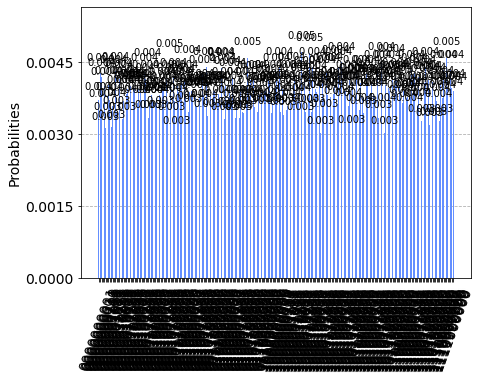

In [8]:
backend = Aer.get_backend('aer_simulator_matrix_product_state')
backend.shots = 32000

qc.measure_all()
qc = transpile(qc, backend)
qc2 = transpile(qc2,backend)
job = backend.run(qc2, seed_simulator=2703, shots = 32000)
res = job.result()
counts = res.get_counts()

plot_histogram(counts)

In [11]:
dt = res.data()
'''
#print(dt['counts'].keys())
dtkeys = list(dt['counts'].keys())
dtbinrep = []
for k in dtkeys:
    dtbinrep.append(bin(int(k, 16))[2:].zfill(MK+Nt)[:MK])
    
L = len(dtbinrep)
count = 0
for b in dtbinrep:
    if b[0] == '1':
        count +=1

print(L)
print(count)
'''
        
#print(len(dt['counts'].keys()))
#[print(bin(int(k, 16))) for k in dt['counts'].keys()]
[print(bin(int(k, 16))[2:].zfill(MK+Nt)[Nt:]) for k in dt['counts'].keys()]

001011000
010110000
000000101
100010100
010110000
001000000
110001000
000001000
100110000
000001101
001000101
010001000
101001000
110100000
000111000
000000011
000010000
000110010
100010000
001000010
000100011
001110000
001100000
000010010
010000000
010000100
000110000
000101001
101100000
100001000
110000001
000001010
101000001
000011100
100000100
000010011
010000101
100001100
100010001
110000010
001000011
000000001
000011000
101010000
100001001
000100101
000010001
000001110
101000100
001001100
010000000
100000110
001011000
011001000
010001001
100000011
000110100
001010010
000000010
010101000
000101000
000111000
000001010
000101001
001000101
000011001
001100010
100100010
000101010
010010000
101001000
000100001
000010100
100000101
000011001
100100001
001000110
000000101
000101100
001000100
000000111
110000010
110010000
110000100
010101000
011000000
010001001
100100001
000011000
011010000
001001001
010000110
100100100
011000100
110000001
010100000
010100001
001000001
100101000
101000001


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
BW_card = 0
for i in range(BW_max):
    BW_card += scipy.special.comb(MK,i+1)
print(BW_card)

129.0


In [12]:
xlist = [1,2,3,4,5]
print(xlist[::-1])

[5, 4, 3, 2, 1]
